# Model Comparison and Selection
- since no single classifier will work best for all the problems, we need to experiment with a handful
- need to effectively compare the models and select the best one for the problem

## Over and under fitting models
- over or under fitting can occur if training data is not properly sampled or features are not properly selected
- models can suffer from underfitting (**high bias**) if the model is too simple
    - **bias** measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different datasets
- models can suffer from overfitting the training data (**high variance**) if the model is too complex for the underlying training data
    - **variance** measures the consistency (or variability) of the model prediction for classifying a particular example if we retrain the model multiple times, e.g., on different subsets of the training dataset
- the following figure demonstrates under and over fitting the models based

![Under-Over fitting](./images/under-over-fitting.png)

## K-fold cross-validation

- k-fold cross-validation can help us obtain reliable estimates of the model's performance on unseen data
![K-fold Cross validation](./images/cross-validation.png)

- stratified k-fold cross-validation can yield better bias and variance estimates, especially in cases of unequal class proportions
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

### Breast Cancer Wisconsin dataset
- details: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
- let's use the binary classification dataset for detecting breast cancer

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)

In [3]:
df
# Note col 0 is ID of the sample and col 1 is the corresponding diagnoses (M = malignant, B = benign)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [35]:
# class distribution
df.groupby(1).size()

1
B    357
M    212
dtype: int64

In [5]:
# Let's create X and y numpy ndarrays
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [6]:
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [32]:
y[:5]

array([1, 1, 1, 1, 1])

In [8]:
# let's encode the labels with LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
y[-10:]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0])

In [11]:
y.shape

(569,)

In [12]:
X.shape

(569, 30)

In [13]:
le.classes_
# 0 is Benign (Not-Cancer) and 1 is Malignant (Cancer)

array(['B', 'M'], dtype=object)

In [14]:
# let's Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
sc.fit(X) # fit the whole data to calculate mean and standard deviation
X_sc = sc.transform(X) # transform training set

In [16]:
# let's do the StratifiedKFold cross validation
from sklearn.model_selection import StratifiedKFold
# use logistic regression classifier
from sklearn.linear_model import LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
kfold = StratifiedKFold(n_splits=10)

In [18]:
scores = []
for k, (train, test) in enumerate(kfold.split(X_sc, y)): # iterator
    lr_model = LogisticRegression(random_state=1, solver='lbfgs')
    #print(train.shape, test.shape)
    lr_model.fit(X_sc[train], y[train])
    score = lr_model.score(X_sc[test], y[test])
    scores.append(score)
    print(f'Fold:{k+1:2d}, Class dist.:{np.bincount(y[train])}, Acc: {score:.3f}')

Fold: 1, Class dist.:[322 190], Acc: 0.982
Fold: 2, Class dist.:[322 190], Acc: 0.982
Fold: 3, Class dist.:[321 191], Acc: 0.982
Fold: 4, Class dist.:[321 191], Acc: 0.965
Fold: 5, Class dist.:[321 191], Acc: 0.982
Fold: 6, Class dist.:[321 191], Acc: 0.982
Fold: 7, Class dist.:[321 191], Acc: 0.947
Fold: 8, Class dist.:[321 191], Acc: 1.000
Fold: 9, Class dist.:[321 191], Acc: 1.000
Fold:10, Class dist.:[322 191], Acc: 0.982


In [19]:
print(f'CV accuracy : {np.mean(scores):.3f}, +/- {np.std(scores):.3f}')

CV accuracy : 0.981, +/- 0.015


In [20]:
# better: use scikit learn's cross_val_score
from sklearn.model_selection import cross_val_score

In [21]:
lr_model = LogisticRegression(random_state=1, solver='lbfgs')
scores = cross_val_score(estimator=lr_model, X=X_sc, y=y, cv=10, n_jobs=-1)
# n_jobs = -1 means use all available processors to do computation in parallel

In [22]:
print(f'CV accuracy scores: {scores}')

CV accuracy scores: [0.98245614 0.98245614 0.98245614 0.96491228 0.98245614 0.98245614
 0.94736842 1.         1.         0.98214286]


In [23]:
print(f'CV accuracy: {np.mean(scores):.3f}, +/- {np.std(scores):.3f}')

CV accuracy: 0.981, +/- 0.015


In [24]:
# let's compare a handful of Classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [25]:
names = ["KNN", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", 'Logistic Reg']
scores = [] # store (name, mean, std_dev) for each classifier
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=1, solver='lbfgs')
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    cvs = cross_val_score(estimator=clf, X=X_sc, y=y, cv=10, n_jobs=-1)
    scores.append((name, np.mean(cvs), np.std(cvs)))
    

/home/codespace/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the

In [26]:
scores

[('KNN', np.float64(0.9647869674185465), np.float64(0.02239183921884522)),
 ('Linear SVM',
  np.float64(0.9736215538847116),
  np.float64(0.021152440486425998)),
 ('RBF SVM', np.float64(0.6274122807017544), np.float64(0.006965956216784447)),
 ('Gaussian Process',
  np.float64(0.9789473684210526),
  np.float64(0.017189401703741607)),
 ('Decision Tree',
  np.float64(0.9157894736842105),
  np.float64(0.04354271454733634)),
 ('Random Forest',
  np.float64(0.938533834586466),
  np.float64(0.02379377199566088)),
 ('Neural Net',
  np.float64(0.9771616541353383),
  np.float64(0.020824474721646426)),
 ('AdaBoost',
  np.float64(0.9718984962406015),
  np.float64(0.025044655973063212)),
 ('Naive Bayes',
  np.float64(0.9315162907268169),
  np.float64(0.0327113878182645)),
 ('QDA', np.float64(0.9560776942355889), np.float64(0.02110040899790857)),
 ('Logistic Reg',
  np.float64(0.9806704260651629),
  np.float64(0.01456955548732776))]

In [27]:
# let's sort the scores in descending order of accuracy
scores.sort(key=lambda t: t[1], reverse=True)

In [28]:
scores

[('Logistic Reg',
  np.float64(0.9806704260651629),
  np.float64(0.01456955548732776)),
 ('Gaussian Process',
  np.float64(0.9789473684210526),
  np.float64(0.017189401703741607)),
 ('Neural Net',
  np.float64(0.9771616541353383),
  np.float64(0.020824474721646426)),
 ('Linear SVM',
  np.float64(0.9736215538847116),
  np.float64(0.021152440486425998)),
 ('AdaBoost',
  np.float64(0.9718984962406015),
  np.float64(0.025044655973063212)),
 ('KNN', np.float64(0.9647869674185465), np.float64(0.02239183921884522)),
 ('QDA', np.float64(0.9560776942355889), np.float64(0.02110040899790857)),
 ('Random Forest',
  np.float64(0.938533834586466),
  np.float64(0.02379377199566088)),
 ('Naive Bayes',
  np.float64(0.9315162907268169),
  np.float64(0.0327113878182645)),
 ('Decision Tree',
  np.float64(0.9157894736842105),
  np.float64(0.04354271454733634)),
 ('RBF SVM', np.float64(0.6274122807017544), np.float64(0.006965956216784447))]

## ROC curve

- Good resource - https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- Receiver Operating Characteristic (ROC) graphs are used to select models for classification based on the performance with respect to the FPR and TPR
- useful for comparing performances of models as long as the dataset is roughly balanced
    - use precision-recall curve for imbalanced datasets
- the diagonal of the ROC curve can be interpreted as *random guessing*
    - classification models that fall below the diagonal are considered as worse than random guessing
- a perfect classifier would fall into the top-left corner of the graph with a **TPR of 1** and and an **FPR of 0**
- based on ROC curve, we can compute area under the curve (AUC) to characterize the performance of a classification model
- we can use ROC curve for tuning and chosing model and threshold
- threshold choice depends on which metric is most important to the specific use case
    - e.g., if false positives (false alarams) are more costly, it may make sense to choose a threshold that tives a lower FPR even if TPR is reduced (point A in the figure below)
    - conversely if FPR are cheap but false negatives (missed true positives) are costly, the threshold for point C (which maximizes TPR at the cost of higher FPR)
    - point B offers best compromise between TPR and FPR
    
<img src="./images/ROC-TPRvsFPR-Tuning.png" width="40%">


### Logistic Regression - ROC curve for cross validation
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

In [29]:
from sklearn.metrics import RocCurveDisplay, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [30]:
# To generate more representitive ROC graph, 
# we'll use just 2 features 4 and 14 making it more challenging for the classifier
X_train = X_sc[:, [4, 14]]

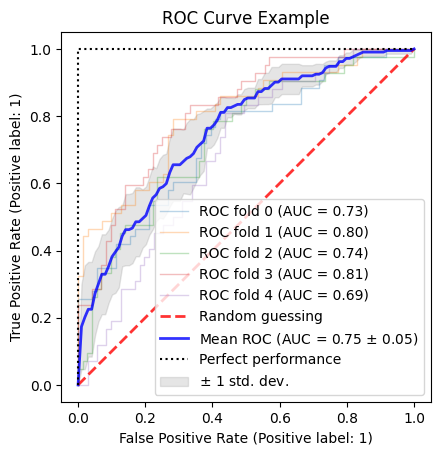

In [31]:
cv = StratifiedKFold(n_splits=5) # just to 5 fold
classifier = LogisticRegression(random_state=1, solver='lbfgs')
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# create and add ROC for each  fold
for i, (train, test) in enumerate(cv.split(X_train, y)): # iterator
    classifier.fit(X_train[train], y[train])
    viz = RocCurveDisplay.from_estimator(classifier, X_train[test], y[test],
                         name=f'ROC fold {i}',
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
# add curve for random guessing
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random guessing', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# add curve for mean scores
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

# add curve for a perfect score
ax.plot([0, 0, 1],
        [0, 1, 1], linestyle=':', color='black', label='Perfect performance')
         
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve Example")
ax.legend(loc="lower right")
plt.show()

## ROC Curve to compare models

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from itertools import cycle
from sklearn.model_selection import train_test_split

In [37]:
# let's compare a handful of Classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [38]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)

In [39]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [40]:
le = LabelEncoder()
y = le.fit_transform(y)

In [41]:
sc = StandardScaler()
sc.fit(X) # fit the whole data to calculate mean and standard deviation
X_sc = sc.transform(X) # transform training set

In [42]:
names = ["KNN", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", 'Logistic Reg']

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=1, solver='lbfgs')
]
mean_fpr = np.linspace(0, 1, 100)
#cv = StratifiedKFold(n_splits=5) # just to 5 fold

/home/codespace/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

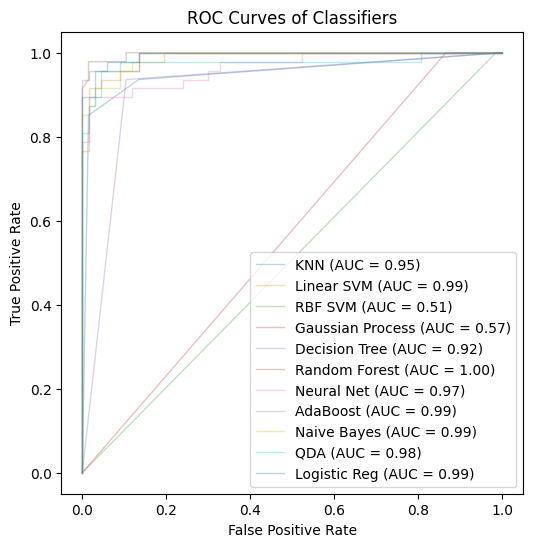

In [43]:
# let's plot the ROC Curves for all the classifiers
fig, ax = plt.subplots(figsize=(10, 6))
lw=2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                random_state=0)
for name, classifier in zip(names, classifiers):
    classifier.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(classifier, X_test, y_test,
                         name=f'{name}',
                         alpha=0.3, lw=1, ax=ax)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve Example")
ax.legend(loc="lower right")
plt.title("ROC Curves of Classifiers")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()